<p> Purpose of this notebook is to strictly produce figures for viewing the data comprehensively--no ML needed! </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

filename = '../Results/training_data.csv'#'salvaged_RC_data.csv'#'dataset_072522.csv'
df = pd.read_csv(filename)

label="Labels"
features=features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
#        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
   'eccentricity'
         ]

In [2]:
# Modify Data (Remove illegal data OR set different runtime)
# Missed Labels
df['Labels'].replace('', np.nan, inplace=True) 
df.dropna(subset=['Labels'], inplace=True)
#df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True)
#df['Labels'].replace('Multiple Crystal', 'Incomplete', inplace=True)

# Numerical errors (divide by 0)
for feature in features:
    df.dropna(subset=[feature],inplace=True)

# Remove Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

C_df = df[df['Labels'] == 'Crystal']
MC_df = df[df['Labels'] == 'Multiple Crystal']
I_df = df[df['Labels'] == 'Incomplete']
P_df = df[df['Labels'] == 'Poorly Segmented']

C_df = C_df[features]
MC_df = MC_df[features]
I_df = I_df[features]
P_df = P_df[features]

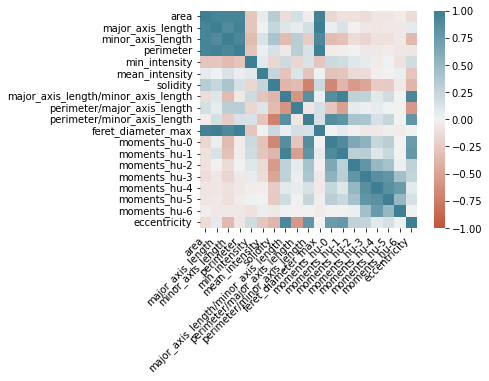

In [3]:
sub_df = C_df
corr = sub_df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


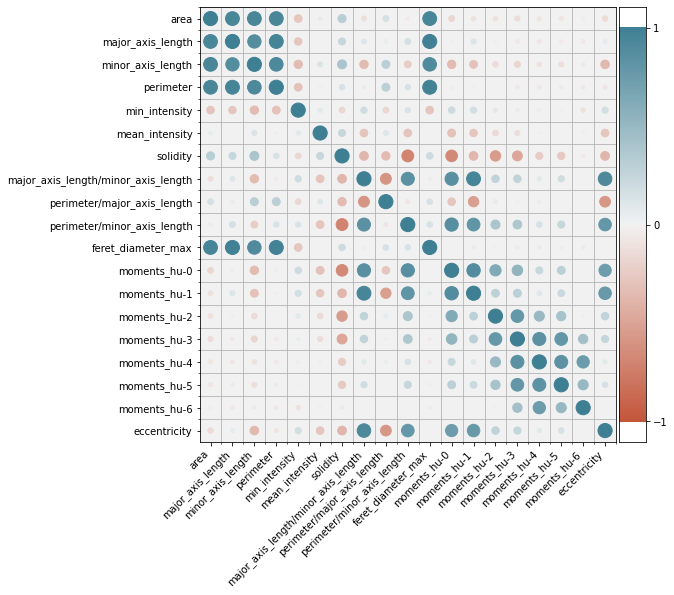

In [4]:
from heatmap import heatmap, corrplot
sub_df = C_df
plt.figure(figsize=(8,8))

corrplot(C_df.corr(),size_scale=200,marker='o')

303


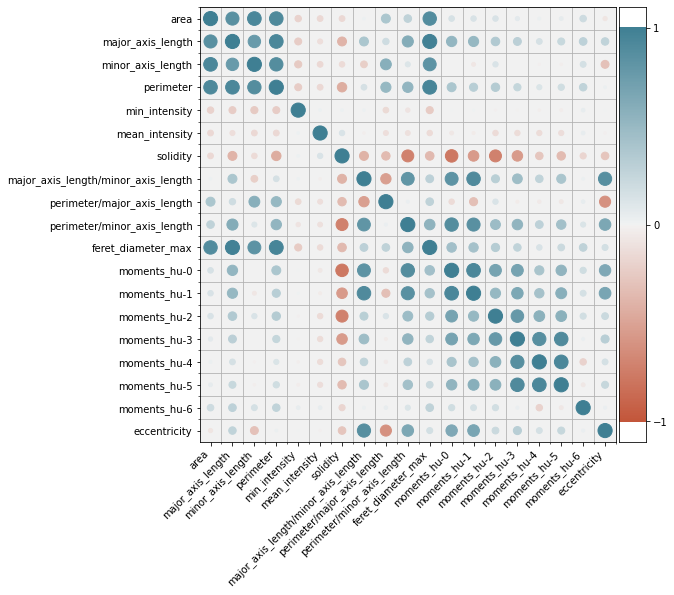

In [5]:
plt.figure(figsize=(8,8))
corrplot(MC_df.corr(),size_scale=200,marker='o')
print(len(MC_df))

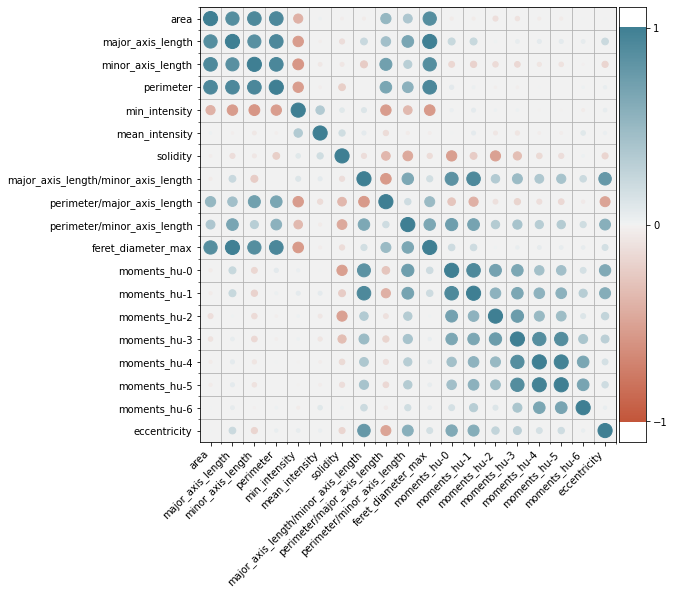

In [6]:
plt.figure(figsize=(8,8))
corrplot(I_df.corr(),size_scale=200,marker='o')

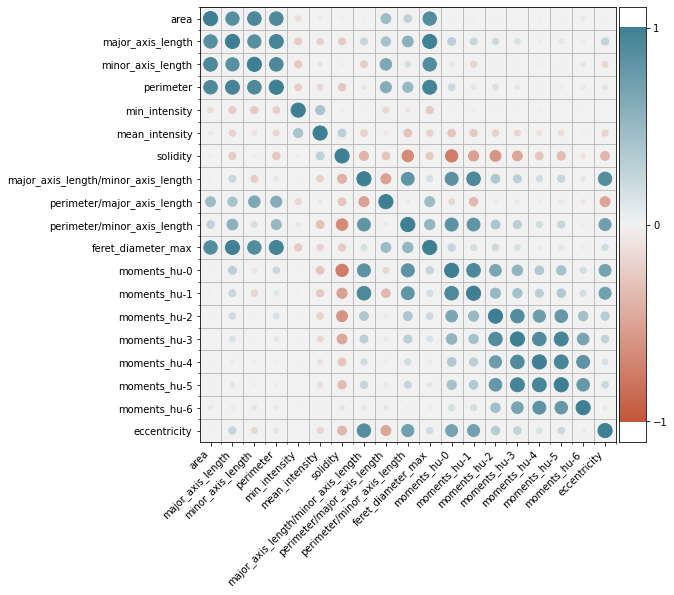

In [7]:
plt.figure(figsize=(8,8))
corrplot(P_df.corr(),size_scale=200,marker='o')

/tmp/ipykernel_7343/390961074.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


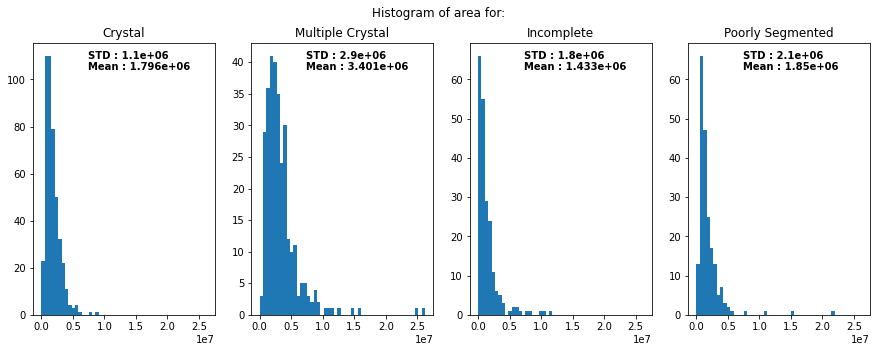

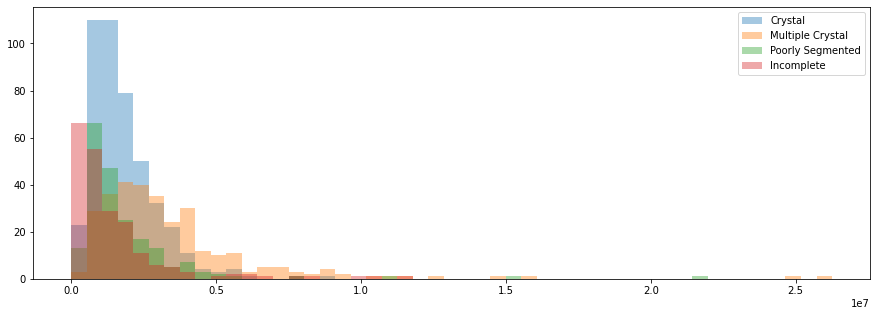

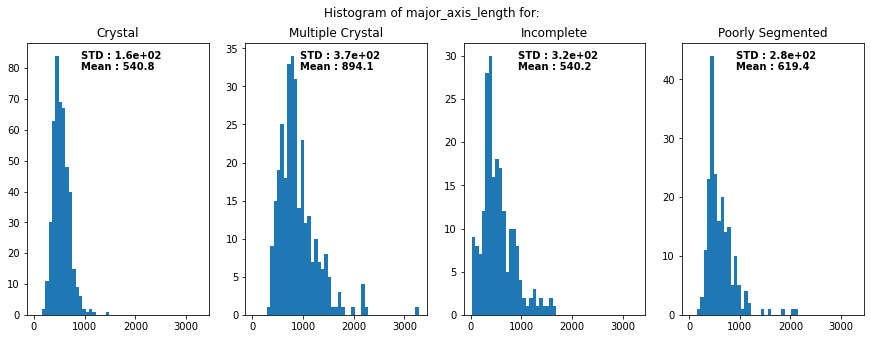

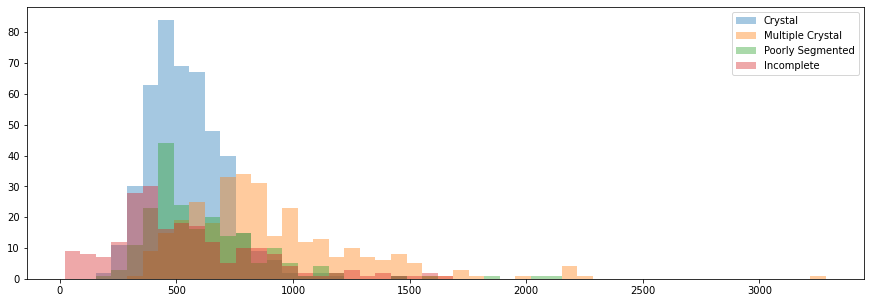

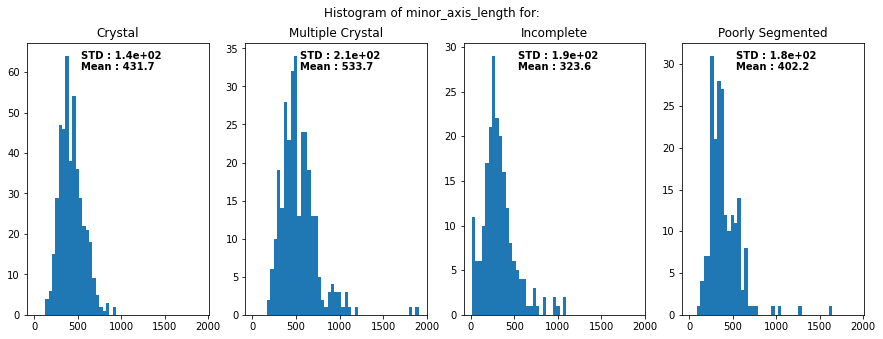

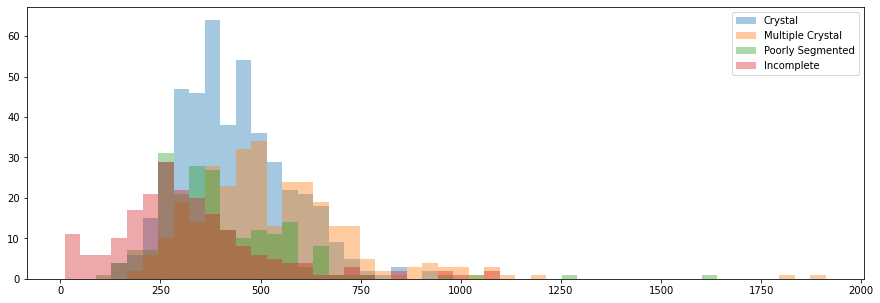

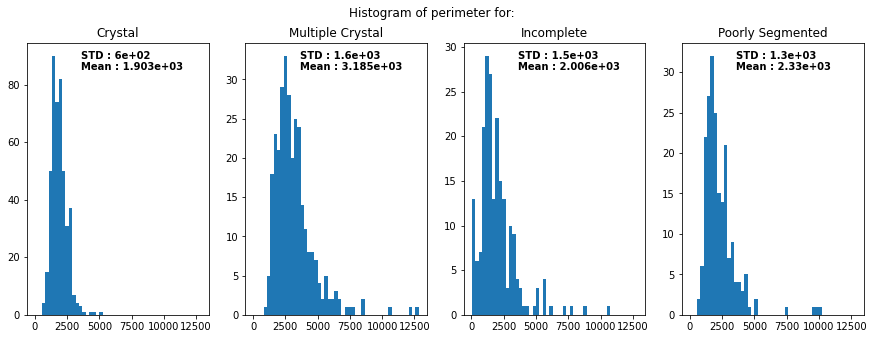

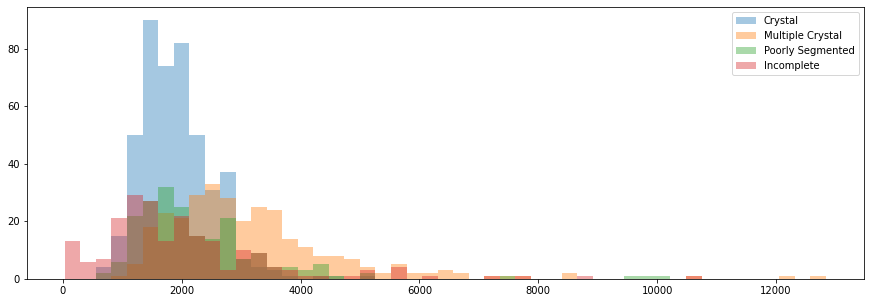

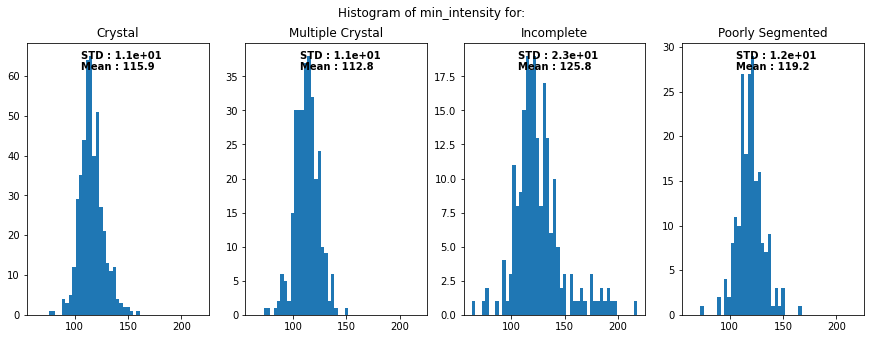

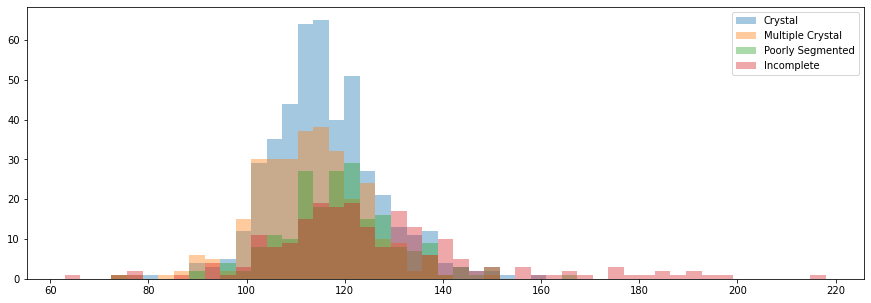

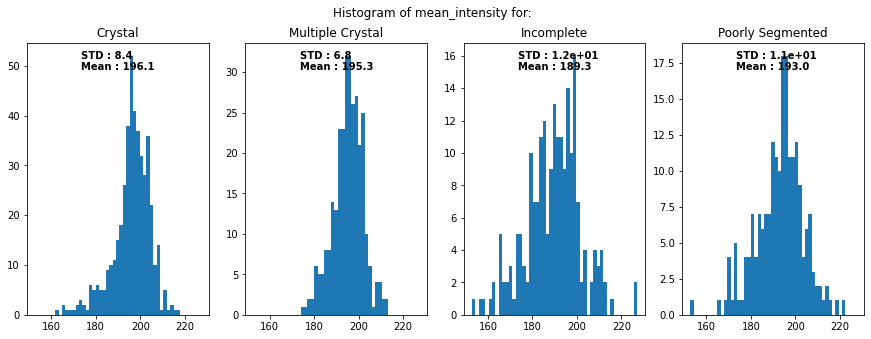

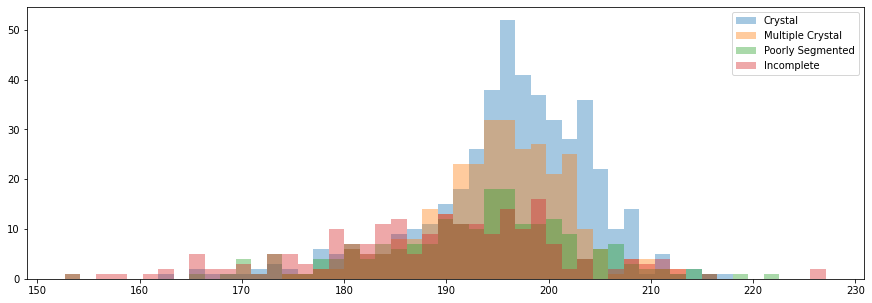

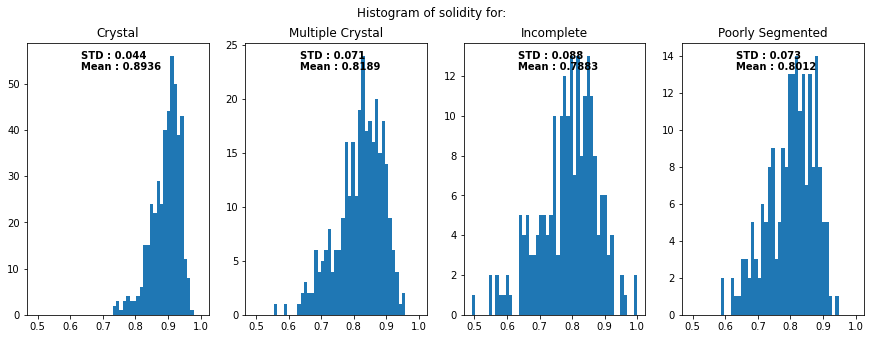

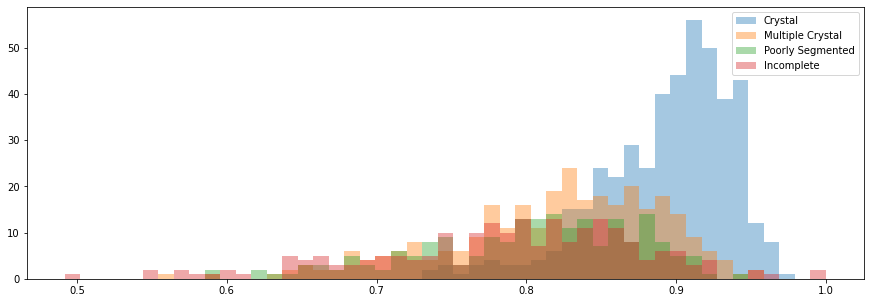

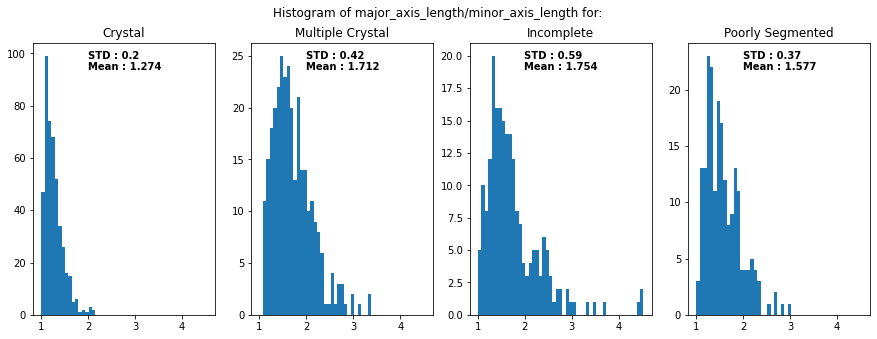

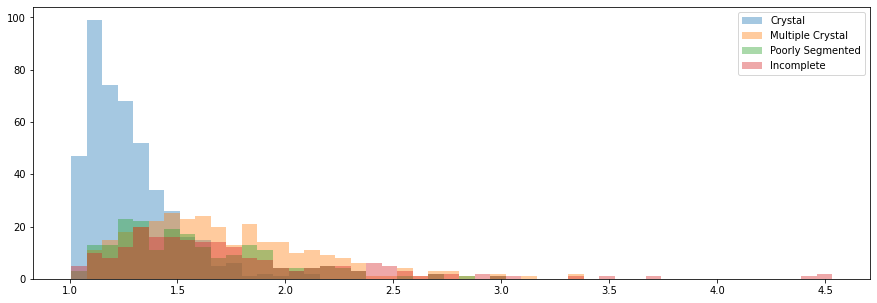

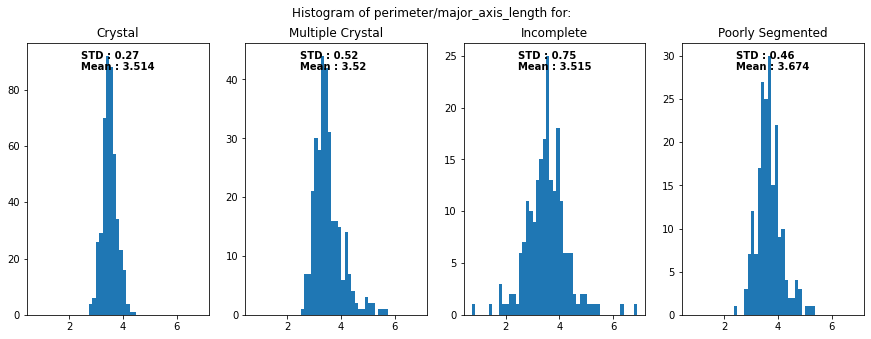

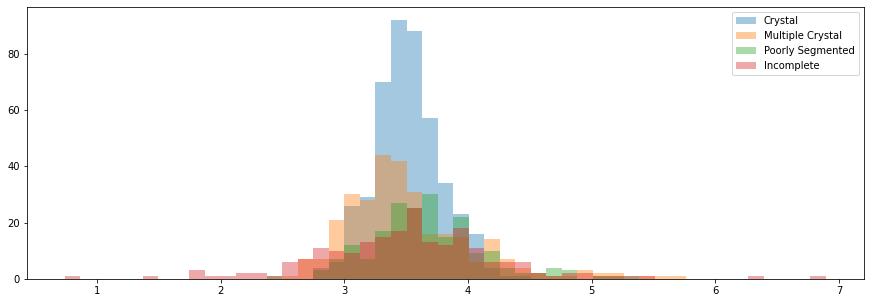

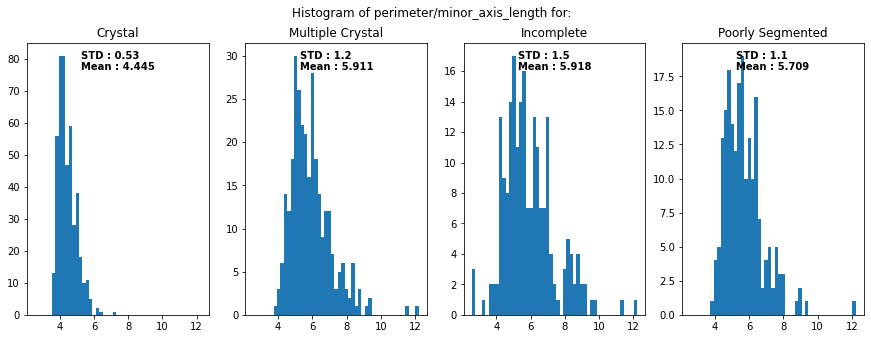

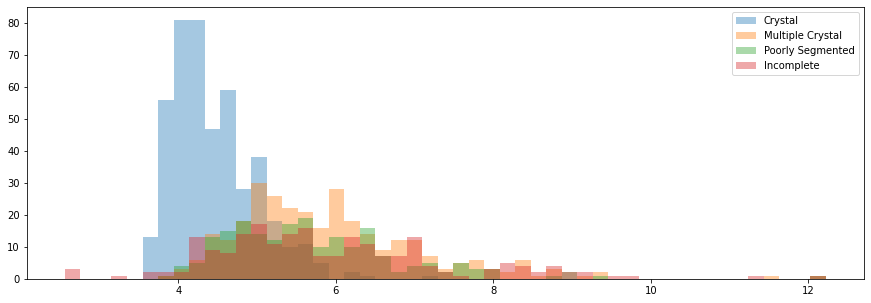

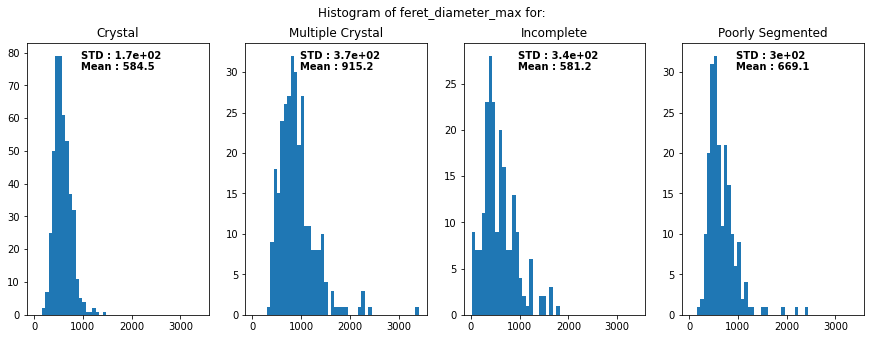

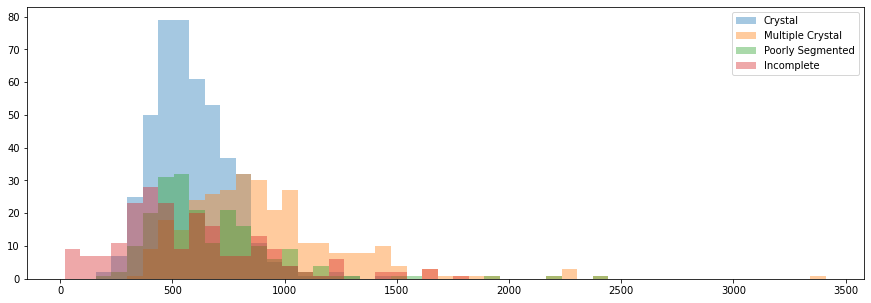

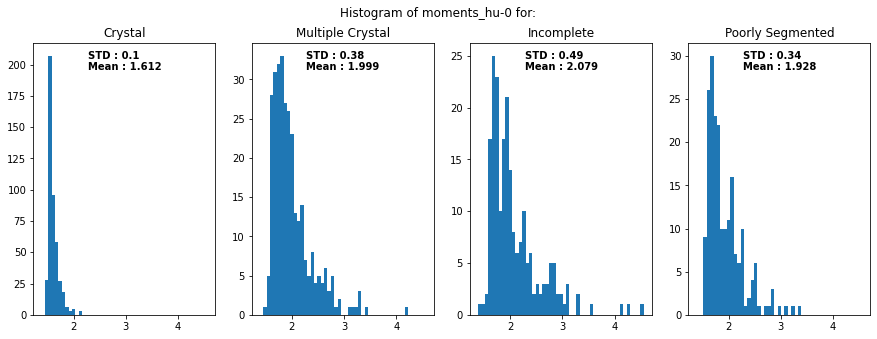

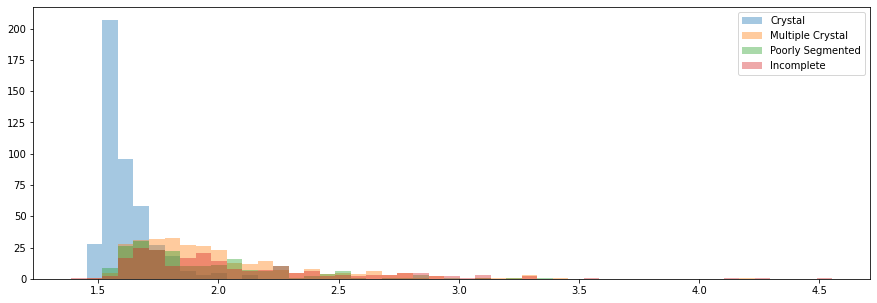

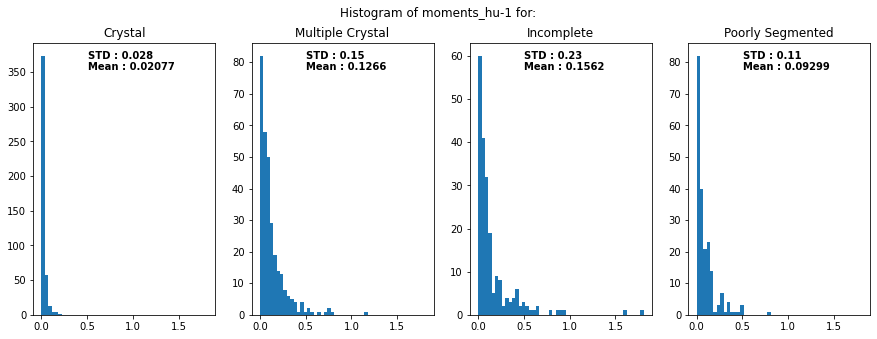

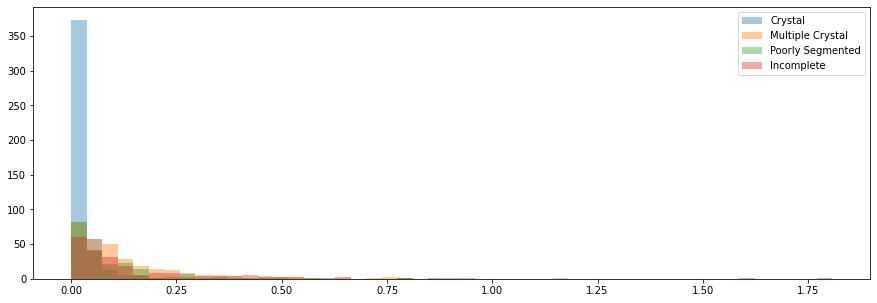

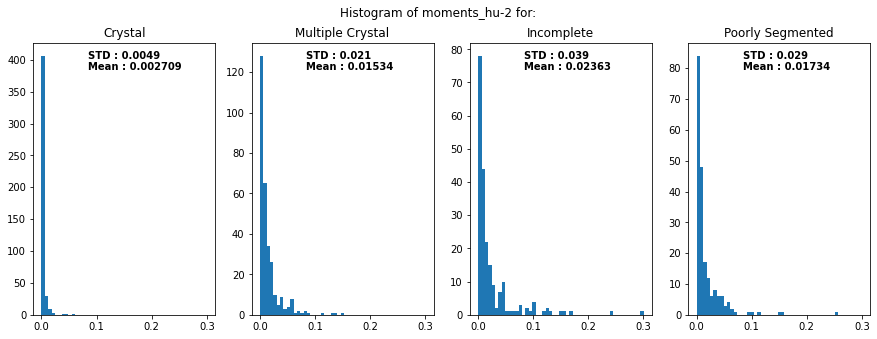

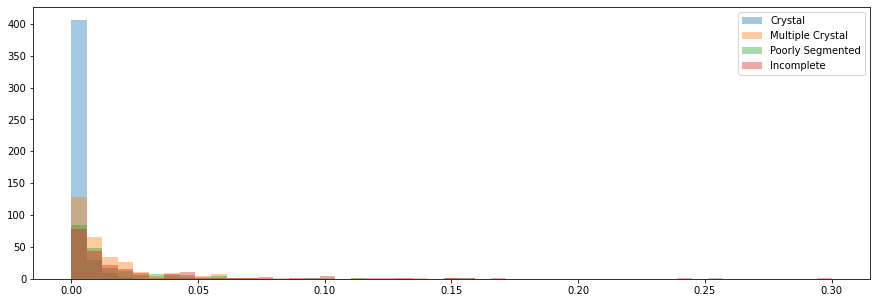

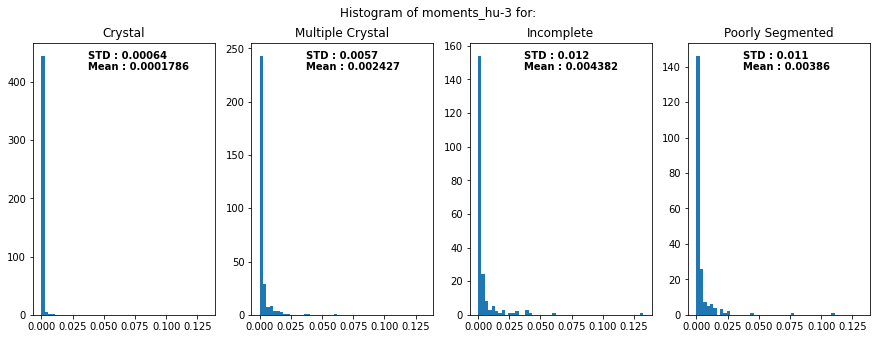

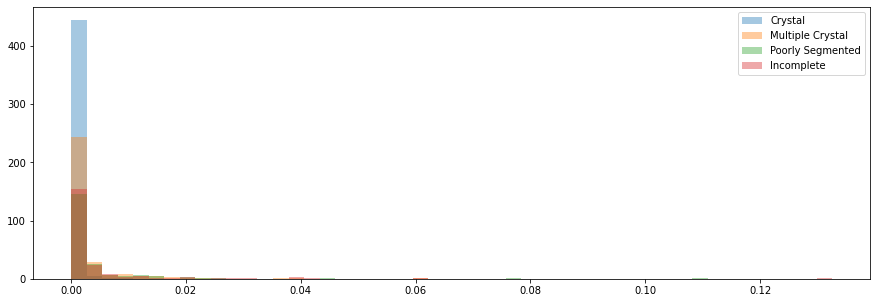

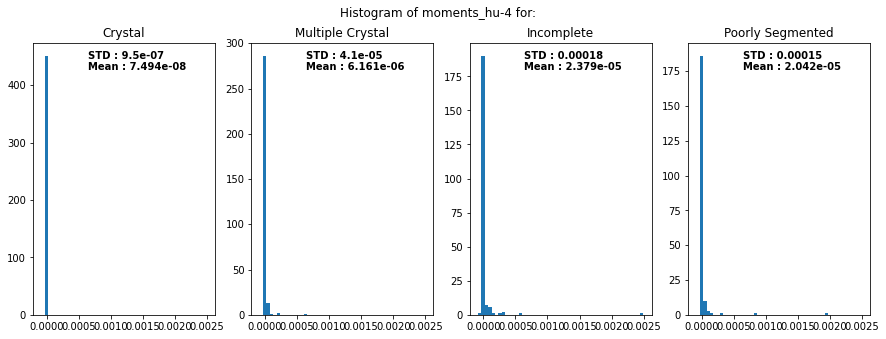

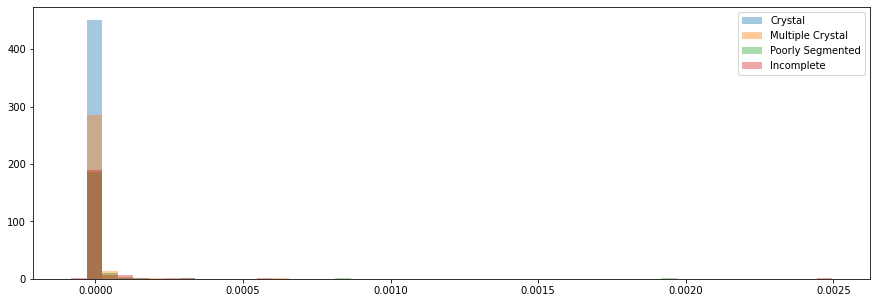

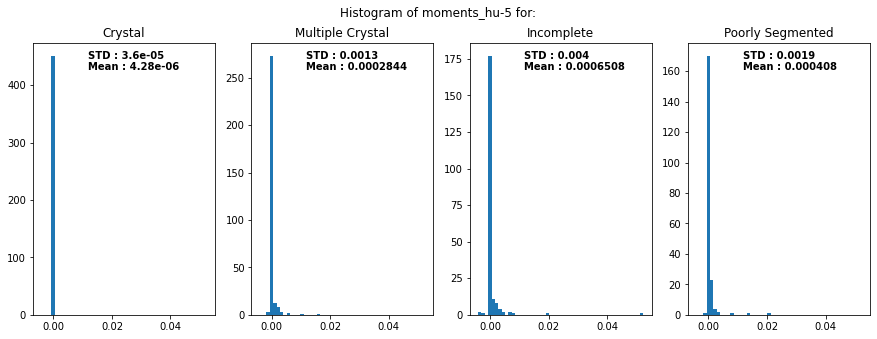

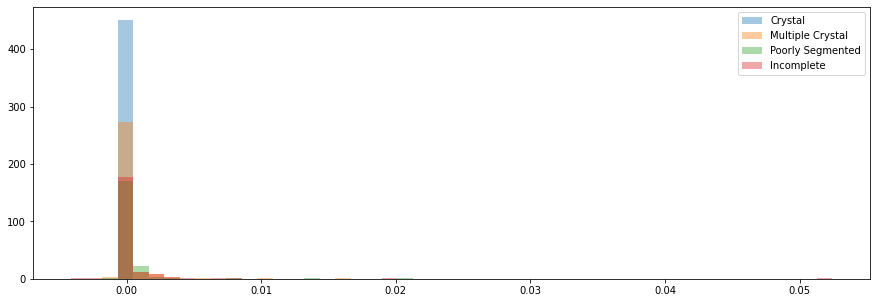

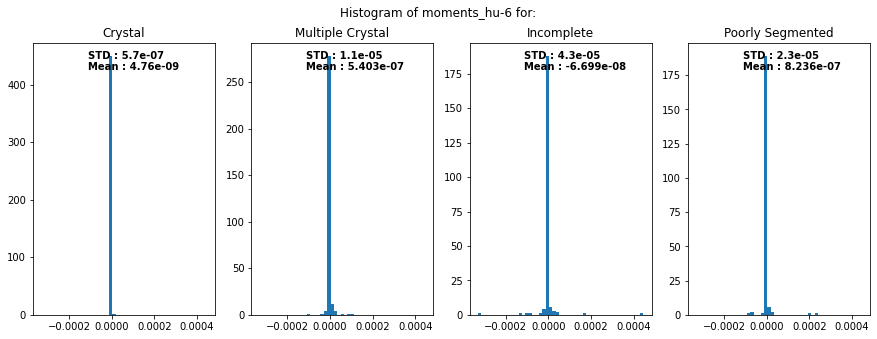

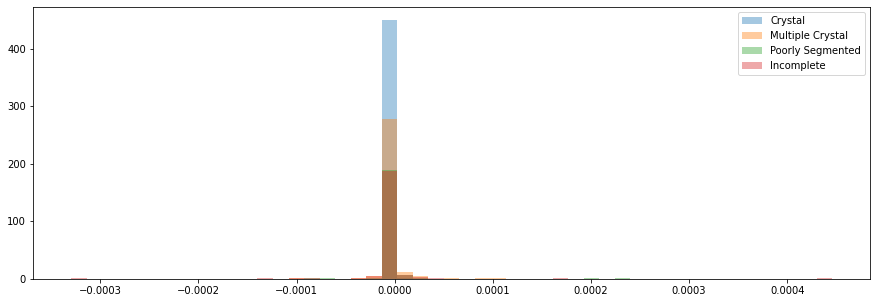

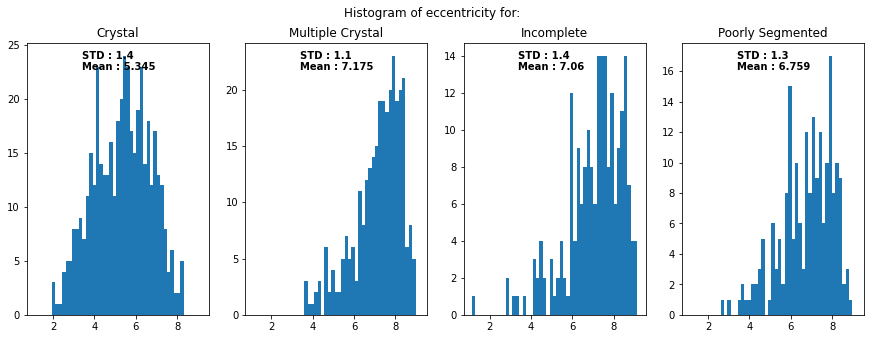

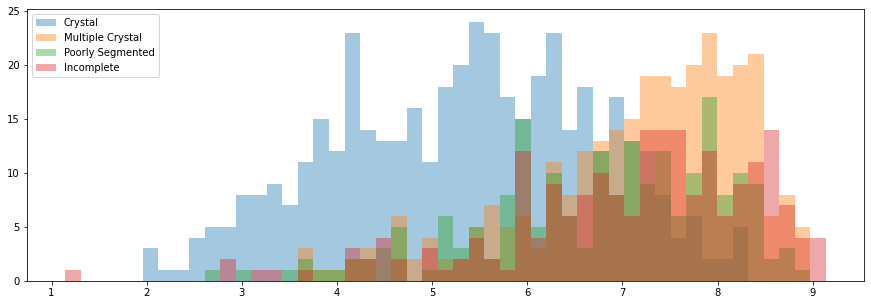

In [8]:
for feature in features:
    fig, ax = plt.subplots(1, 4,figsize = (15, 5))
    fig.suptitle(f'Histogram of {feature} for:')
    
    # Histogram common setting search
    histogram_min = np.min([np.min(C_df[feature]),np.min(MC_df[feature]),np.min(I_df[feature]),np.min(P_df[feature])])
    histogram_max = np.max([np.max(C_df[feature]),np.max(MC_df[feature]),np.max(I_df[feature]),np.max(P_df[feature])])
    histogram_bins = np.linspace(histogram_min,histogram_max,50)
    
    ii = 0
    for sub_label,sub_df in [('Crystal',C_df),('Multiple Crystal',MC_df),
                             ('Incomplete',I_df),('Poorly Segmented',P_df)]:
        ax[ii].hist(sub_df[feature],bins=histogram_bins)
        ax[ii].title.set_text(sub_label)
        sigma = np.std(sub_df[feature])
        mu = np.mean(sub_df[feature])
        stats_text = f'STD : {sigma:.2}\nMean : {mu:.4}'
        plt.text(0.3, 0.9, stats_text, fontweight="bold", transform=ax[ii].transAxes)
        ii += 1
    fig.show()
    
    # Overlapping Histograms
    plt.figure(figsize = (15, 5))
    labels_of_interest = ['Crystal','Multiple Crystal','Poorly Segmented','Incomplete']
    for exact_label in labels_of_interest:
        plt.hist(df[df["Labels"] == exact_label][feature],bins=histogram_bins,alpha=0.4,label=exact_label)
    plt.legend()
    plt.show()


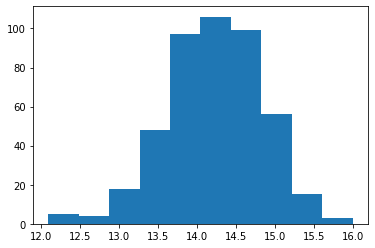

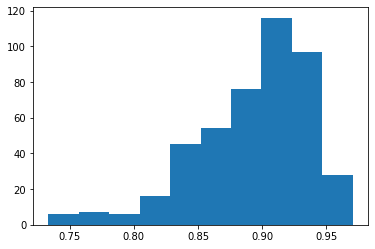

In [9]:
plt.hist(np.log(C_df['area']))
plt.show()
plt.hist(C_df['solidity'])
plt.show()

Crystal area (min,mean,max): 177693.90184799992,1796040.7116325847,8866596.639433997
Incomplete area (min,mean,max): 2467.970858999999,1433248.6131728473,11482645.749973996
Multiple Crystal area (min,mean,max): 445057.41157299984,3401148.9228441273,26251806.027183
Poorly Segmented area (min,mean,max): 134915.74029199994,1850374.322151492,21907354.65838999


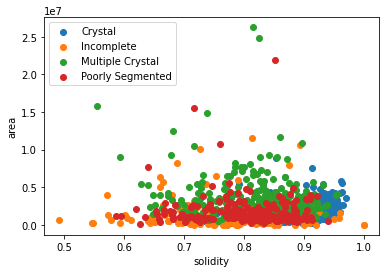

Crystal equivalent_diameter (min,mean,max): 155.38944866622785,472.9109813963922,1097.6496413564937
Incomplete equivalent_diameter (min,mean,max): 18.31282214612144,383.07086928802585,1249.125997416931
Multiple Crystal equivalent_diameter (min,mean,max): 245.91967871028703,638.9485546464717,1888.7081623060235
Poorly Segmented equivalent_diameter (min,mean,max): 135.39934836462842,462.55269093730726,1725.362018578934


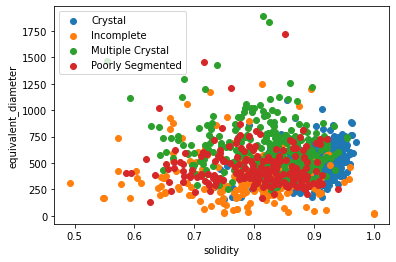

Crystal major_axis_length (min,mean,max): 186.36740255495988,540.8307081146768,1436.1444725861795
Incomplete major_axis_length (min,mean,max): 21.639088089227176,540.2470383348618,1639.6371582676754
Multiple Crystal major_axis_length (min,mean,max): 295.9960222904768,894.1174924967793,3284.434721494381
Poorly Segmented major_axis_length (min,mean,max): 203.3466386040576,619.3550846434644,2088.179439037752


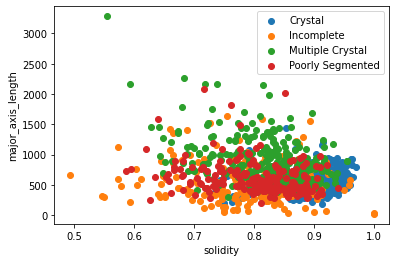

Crystal minor_axis_length (min,mean,max): 129.74043803703893,431.7470715029015,917.5226841509254
Incomplete minor_axis_length (min,mean,max): 11.325297851047695,323.60092310782846,1091.9909262370186
Multiple Crystal minor_axis_length (min,mean,max): 170.4598530022296,533.7353225732301,1911.462129395296
Poorly Segmented minor_axis_length (min,mean,max): 108.42507262387116,402.20189570133397,1605.1689919024675


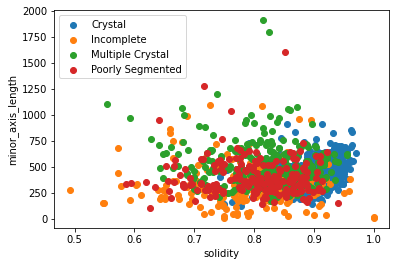

Crystal perimeter (min,mean,max): 620.1418891447693,1903.0524219153376,5076.8475144922295
Incomplete perimeter (min,mean,max): 31.991181079435897,2006.2585368200473,10503.876131713489
Multiple Crystal perimeter (min,mean,max): 1037.359053971795,3185.3797244317784,12837.520262579874
Poorly Segmented perimeter (min,mean,max): 699.9819283199745,2329.5314759587936,10177.315068159667


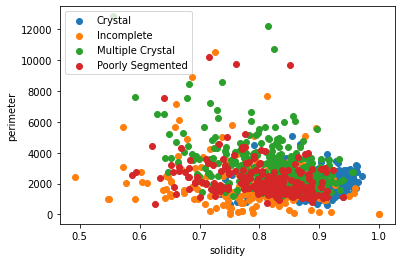

Crystal major_axis_length/minor_axis_length (min,mean,max): 1.0236768053406868,1.2738375207624597,2.138431477375415
Incomplete major_axis_length/minor_axis_length (min,mean,max): 1.0075013478647472,1.7536180608161045,4.530431413006056
Multiple Crystal major_axis_length/minor_axis_length (min,mean,max): 1.084011950803451,1.7122643657571008,3.3513135467385964
Poorly Segmented major_axis_length/minor_axis_length (min,mean,max): 1.0459797651763156,1.577138211183898,3.0144414518486915


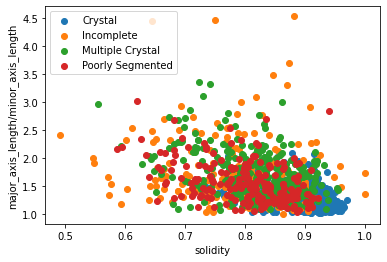

Crystal perimeter/major_axis_length (min,mean,max): 2.767052227851128,3.5143666905183464,4.428042439881254
Incomplete perimeter/major_axis_length (min,mean,max): 0.7401601099281135,3.515468795897955,6.892423191587085
Multiple Crystal perimeter/major_axis_length (min,mean,max): 2.592060021681772,3.5199730570548673,5.652019219085071
Poorly Segmented perimeter/major_axis_length (min,mean,max): 2.4635439608806493,3.673827258010767,5.358032512961697


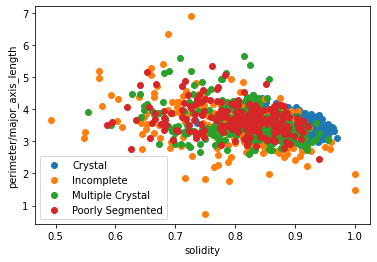

Crystal perimeter/minor_axis_length (min,mean,max): 3.6016362206065367,4.4454624795287225,7.10905206138609
Incomplete perimeter/minor_axis_length (min,mean,max): 2.5606601717798214,5.918309321901024,12.2201836786209
Multiple Crystal perimeter/minor_axis_length (min,mean,max): 3.879868984381384,5.91102662329126,12.062040587393616
Poorly Segmented perimeter/minor_axis_length (min,mean,max): 3.796557027953347,5.709187917243926,12.220314288669396


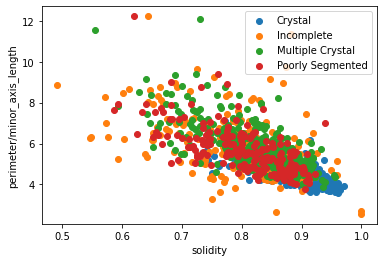

In [10]:
# Data Analysis Seed
features=['area',
    'equivalent_diameter', 
#    'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
#    'min_intensity',
#    'mean_intensity',
#    'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length']

comparison_feature = 'solidity'
label_list = np.unique(df["Labels"]) # ["Crystal","Poorly Segmented"]
feature_list = [feature for feature in features if feature != comparison_feature]

for feature in feature_list:
    for label in label_list:
        xlabel = comparison_feature
        ylabel = feature
        segregated_data = df[df["Labels"] == label]
        xdata=segregated_data[xlabel]
        ydata=segregated_data[ylabel]
        plt.scatter(xdata,ydata)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(label_list)
        print(f'{label} {feature} (min,mean,max): {np.min(ydata)},{np.average(ydata)},{np.max(ydata)}')
    plt.show()

    
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
         ]

      principal component 1  principal component 2
0             -1.284943e+06             218.509307
1             -8.991162e+05            -187.048128
2             -5.799255e+05             280.492278
3             -1.028274e+06             172.126946
4             -1.162367e+06             234.548834
...                     ...                    ...
1162           6.532767e+06            1314.799901
1163          -6.975651e+05            -342.942422
1164          -9.641056e+05           -1033.408934
1165          -1.435488e+06            -553.319765
1166          -1.584389e+06            -263.745389

[1167 rows x 2 columns]


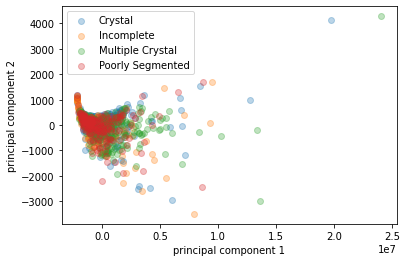

In [11]:
from sklearn.decomposition import PCA
X = df[features]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

finalDf = pd.concat([principalDf, df[['Labels']]], axis = 1)

for label in label_list:
    xlabel = 'principal component 1'
    ylabel = 'principal component 2'
    segregated_data = finalDf[finalDf["Labels"] == label]
    plt.scatter(segregated_data[xlabel],segregated_data[ylabel],alpha=.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(label_list)
plt.show()